In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.describe(include ='O')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Vigoroth,Water,Flying
freq,1,112,97


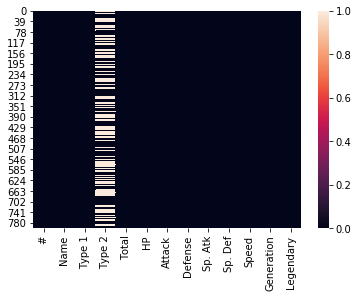

In [6]:
sns.heatmap(df.isnull())

In [7]:
df['Type 2'] = df['Type 2'].fillna(df['Type 1'])

In [8]:
from category_encoders import BinaryEncoder

In [9]:
binaryEnc = BinaryEncoder(cols = ['Type 1', 'Type 2'], drop_invariant = True)

In [10]:
x = binaryEnc.fit_transform(df).drop(['Name', 'Legendary', '#'], axis = 1)

In [11]:
y = df['Legendary']

In [12]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [13]:
cv_score = cross_val_score(LogisticRegression(), x,y,cv = 10)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [14]:
cv_score.mean()

0.921315830598531

In [15]:
kf = KFold(n_splits = 5, shuffle = True)

In [16]:
num = 1
for train_index, test_index in kf.split(x,y):
    print('============== Iterate ke{}=============='.format(num))
    print('============== Train Index ==============')
    print(train_index)
    print('============== Test Index ==============')
    print(test_index)
    num += 1

============== Iterate ke1==============
============== Train Index ==============
[  0   1   2   3   4   6   7  10  11  12  13  14  15  16  18  19  20  21
  22  24  26  27  28  29  30  31  32  33  34  35  37  38  40  41  42  43
  44  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62  64
  65  66  67  69  70  71  72  73  74  75  76  77  78  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 102 104
 105 106 107 108 109 110 111 112 113 115 116 117 118 119 120 121 122 123
 125 126 127 129 131 134 135 136 138 140 141 143 146 147 150 151 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 169 170 171 173 174 178
 179 182 183 184 187 188 189 190 191 195 198 199 200 201 202 203 204 205
 206 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 227 228 229 232 233 234 235 236 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 260 261 263 264 265 266
 267 268 269 271 273 274 276 277 278 279 

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef, log_loss, roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
num = 1
list_score = []
iteration = []
for train_index, test_index in kf.split(x,y):
    X_test, X_train, y_test, y_train = x.iloc[test_index], x.iloc[train_index], y.iloc[test_index], y.iloc[train_index]
    model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1)
    model.fit(X_train,y_train)
    prediction_test = model.predict(X_test)    
    prediction_train = model.predict(X_train)
    listMetrics = [matthews_corrcoef, log_loss,recall_score, precision_score, f1_score, roc_auc_score, accuracy_score ]
    listName = ['Matt_coeff', 'Log_loss' , 'Recall', 'Precision', 'F1', 'ROC AUC', 'Accuracy']
    metrics = {}
    iteration.append('iteration ke {}'. format(num))
    num += 1
    for i,item in enumerate (listMetrics):
        metric_train = item(y_train,prediction_train)
        metric_test = item(y_test,prediction_test)
        metrics['{} train'. format(listName[i])] = metric_train
        metrics['{} test'. format(listName[i])] = metric_test
    list_score.append(metrics)
pd.DataFrame(list_score, index = iteration)     

,Accuracy test,Accuracy train,F1 test,F1 train,Log_loss test,Log_loss train,Matt_coeff test,Matt_coeff train,Precision test,Precision train,ROC AUC test,ROC AUC train,Recall test,Recall train
iteration ke 1,0.96875,1.0,0.857143,1.0,1.079347,9.992007e-16,0.840047,1.0,0.882353,1.0,0.909624,1.0,0.833333,1.0
iteration ke 2,0.96875,1.0,0.761905,1.0,1.079352,9.992007e-16,0.746192,1.0,0.727273,1.0,0.890000,1.0,0.800000,1.0
iteration ke 3,0.93750,1.0,0.666667,1.0,2.158719,9.992007e-16,0.663821,1.0,0.526316,1.0,0.924344,1.0,0.909091,1.0
iteration ke 4,0.97500,1.0,0.857143,1.0,0.863474,9.992007e-16,0.846114,1.0,0.923077,1.0,0.896552,1.0,0.800000,1.0
iteration ke 5,0.97500,1.0,0.818182,1.0,0.863479,9.992007e-16,0.804759,1.0,0.818182,1.0,0.902379,1.0,0.818182,1.0


In [19]:
def uwuwu (a,b,c,d): # a = x, b = y, c = nsplit, d = model
    kf = KFold(n_splits = c, shuffle = True)
    num = 1
    list_score = []
    iteration = []
    for train_index, test_index in kf.split(a,b):
        X_test, X_train, y_test, y_train = x.iloc[test_index], x.iloc[train_index], y.iloc[test_index], y.iloc[train_index]
        d.fit(X_train,y_train)
        prediction_test = model.predict(X_test)    
        prediction_train = model.predict(X_train)
        listMetrics = [matthews_corrcoef, log_loss,recall_score, precision_score, f1_score]
        listName = ['Matt_coeff', 'Log_loss' , 'Recall', 'Precision', 'F1']
        metrics = {}
        iteration.append('iteration ke {}'. format(num))
        num += 1
        for i,item in enumerate (listMetrics):
            metric_train = item(y_train,prediction_train)
            metric_test = item(y_test,prediction_test)
            metrics['{} train'. format(listName[i])] = round(metric_train, 2)
            metrics['{} test'. format(listName[i])] = round(metric_test, 2)
        list_score.append(metrics)
    df_temp = pd.DataFrame(list_score, index = iteration)
    list_mean = []
    for col in df_temp.columns:
        list_mean.append(df_temp[col].mean())
    df_temp.loc['Average'] = list_mean
    return df_temp

In [20]:
uwuwu(x,y,5,GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1))

,F1 test,F1 train,Log_loss test,Log_loss train,Matt_coeff test,Matt_coeff train,Precision test,Precision train,Recall test,Recall train
iteration ke 1,0.860,0.980,0.650,0.110,0.860,0.98,0.750,0.97,1.0,1.0
iteration ke 2,1.000,0.950,0.000,0.270,1.000,0.95,1.000,0.91,1.0,1.0
iteration ke 3,1.000,0.950,0.000,0.270,1.000,0.95,1.000,0.90,1.0,1.0
iteration ke 4,1.000,0.960,0.000,0.270,1.000,0.95,1.000,0.92,1.0,1.0
iteration ke 5,0.930,0.970,0.430,0.160,0.920,0.97,0.870,0.95,1.0,1.0
Average,0.958,0.962,0.216,0.216,0.956,0.96,0.924,0.93,1.0,1.0
